In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data

day=pd.read_csv("C:\\Users\\hp\\Downloads\\day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#no:of rows and columns
day.shape

(730, 16)

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#dropping instant,dteday,casual,registered
day.drop(['instant','dteday','casual','registered'],axis=1,inplace = True) 

In [8]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
#Mapping
day['mnth']=day['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [11]:
day['season']=day['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})





In [12]:
day['weekday']=day['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [13]:
day['weathersit']=day['weathersit'].map({1:'Clear or partly cloud',2:'Misty and cloudy',3:'Light rain or snow',4:'Heavy rain or snow'})


In [14]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Misty and cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Misty and cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear or partly cloud,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear or partly cloud,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear or partly cloud,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
day.shape

(730, 12)

In [16]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


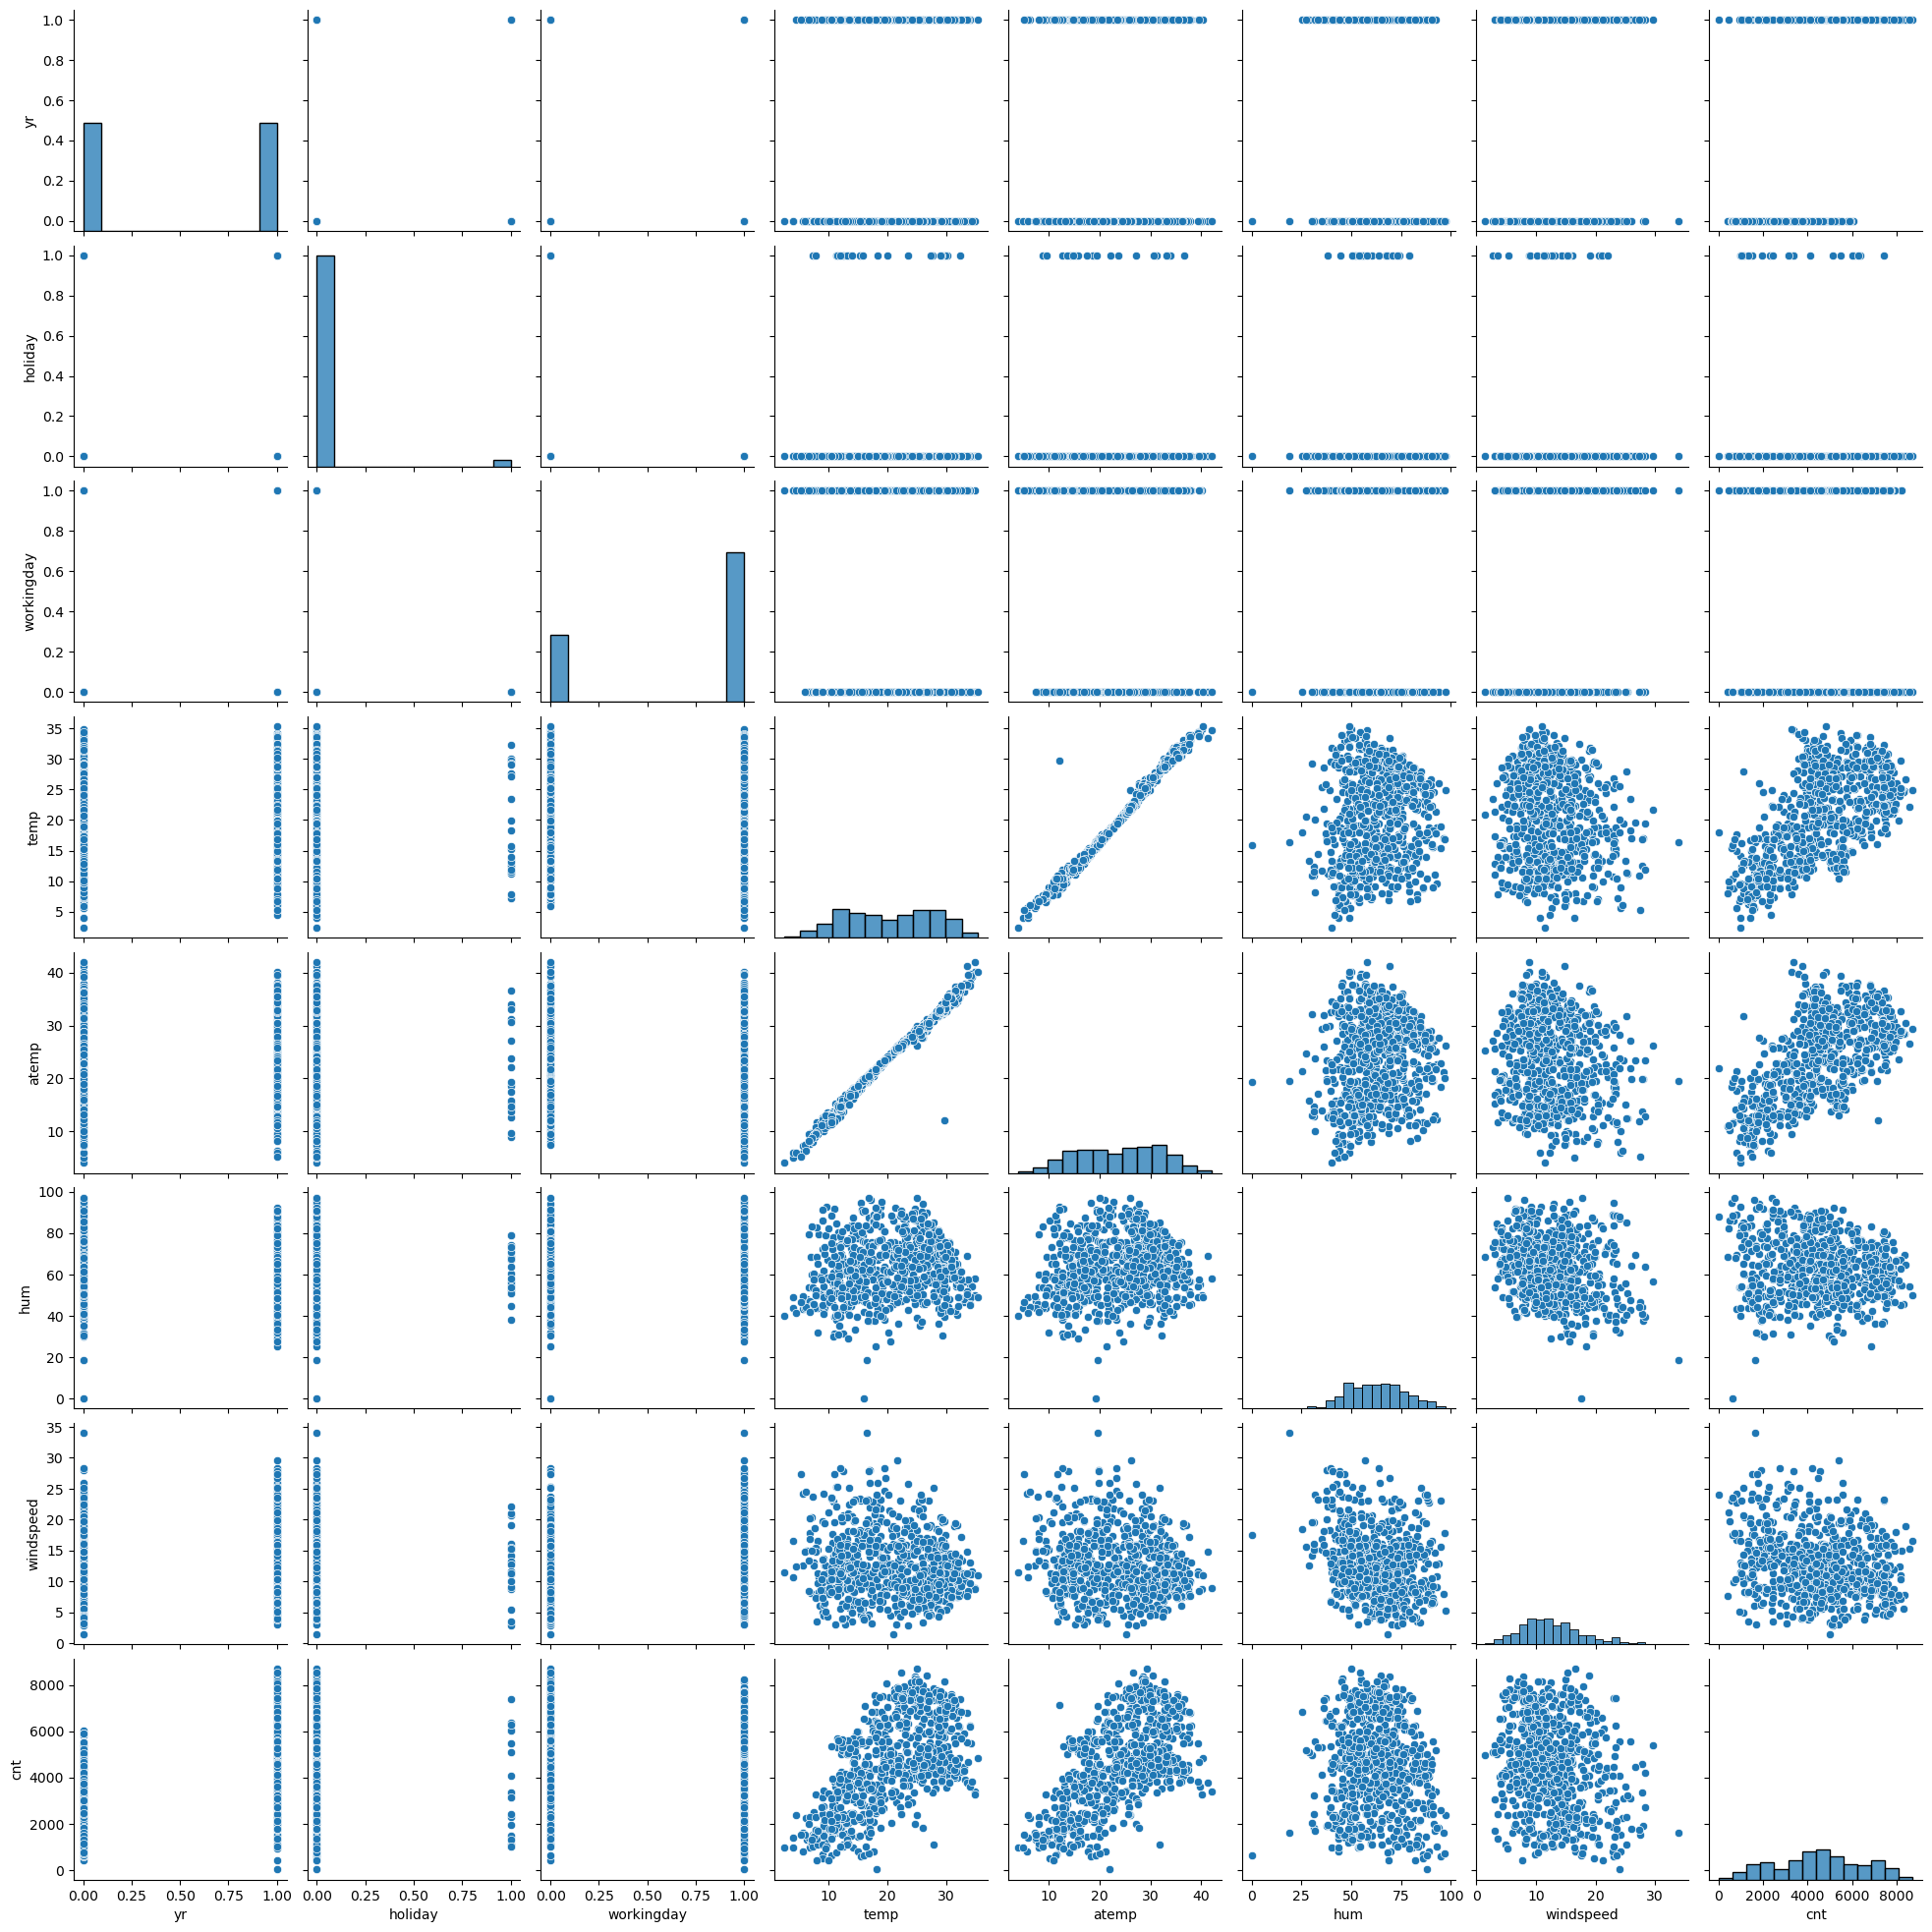

In [17]:
#visualise the data(numerical)
sns.pairplot(day)
plt.show()

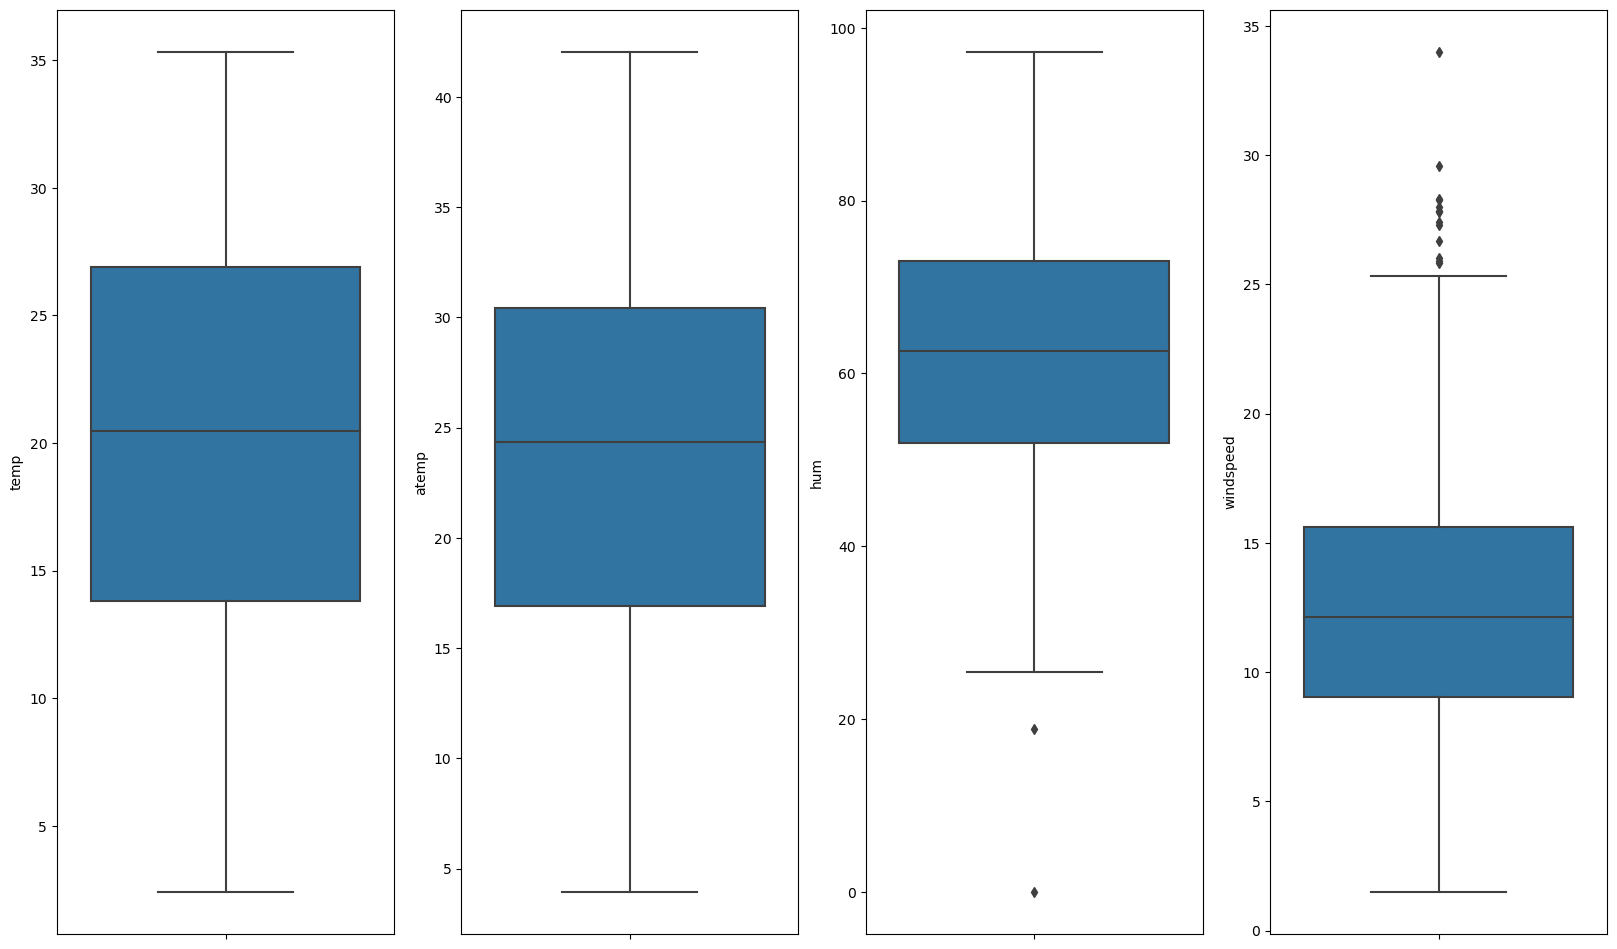

In [18]:
plt.figure(figsize=(20,12))
plt.subplot(1,4,1)
sns.boxplot(y='temp',data=day)
plt.subplot(1,4,2)
sns.boxplot(y='atemp',data=day)
plt.subplot(1,4,3)
sns.boxplot(y='hum',data=day)
plt.subplot(1,4,4)
sns.boxplot(y='windspeed',data=day)
plt.show()

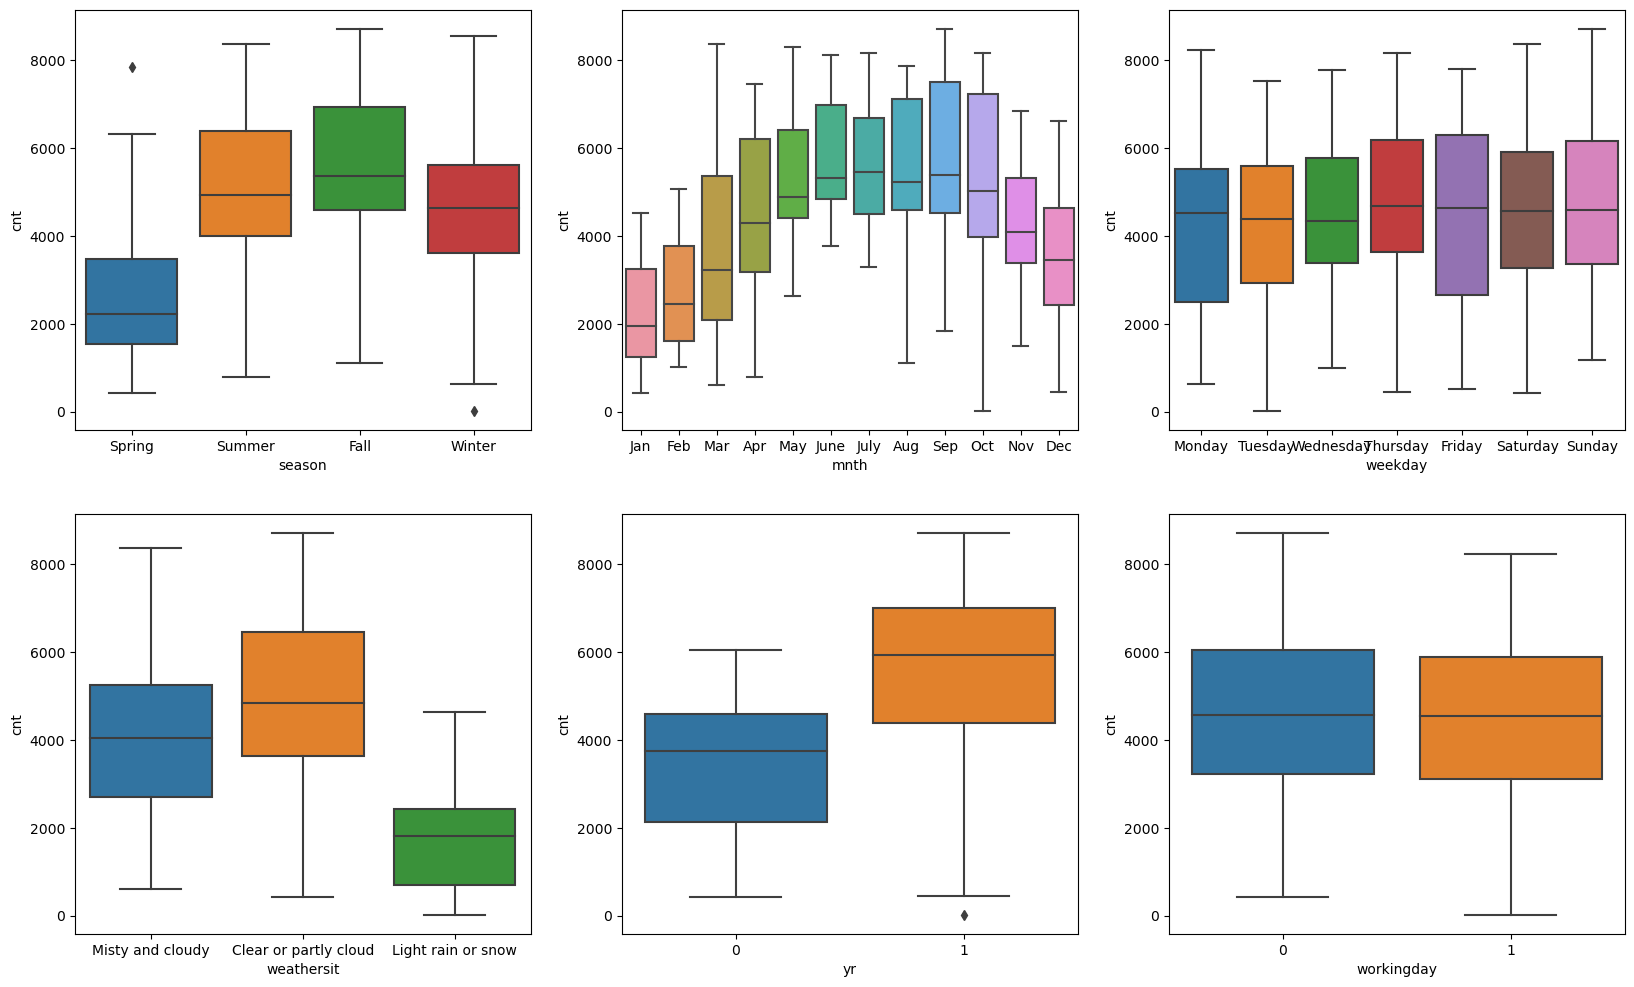

In [19]:
#visualising the categorical variables(boxplot)
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=day)

plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt',data=day)

plt.subplot(2,3,3)
sns.boxplot(x='weekday',y='cnt',data=day)

plt.subplot(2,3,4)
sns.boxplot(x='weathersit',y='cnt',data=day)


plt.subplot(2,3,5)
sns.boxplot(x='yr',y='cnt',data=day)

plt.subplot(2,3,6)
sns.boxplot(x='workingday',y='cnt',data=day)


plt.show()


-More number of bikes rented in Fall season
-More number of bikes rented in September season
-More number of bikes rented in friday 
-More number of bikes rented in Clear or partly weather
-More number of bikes rented in 2019
-The number of bike rented on working day and holiday are almost same


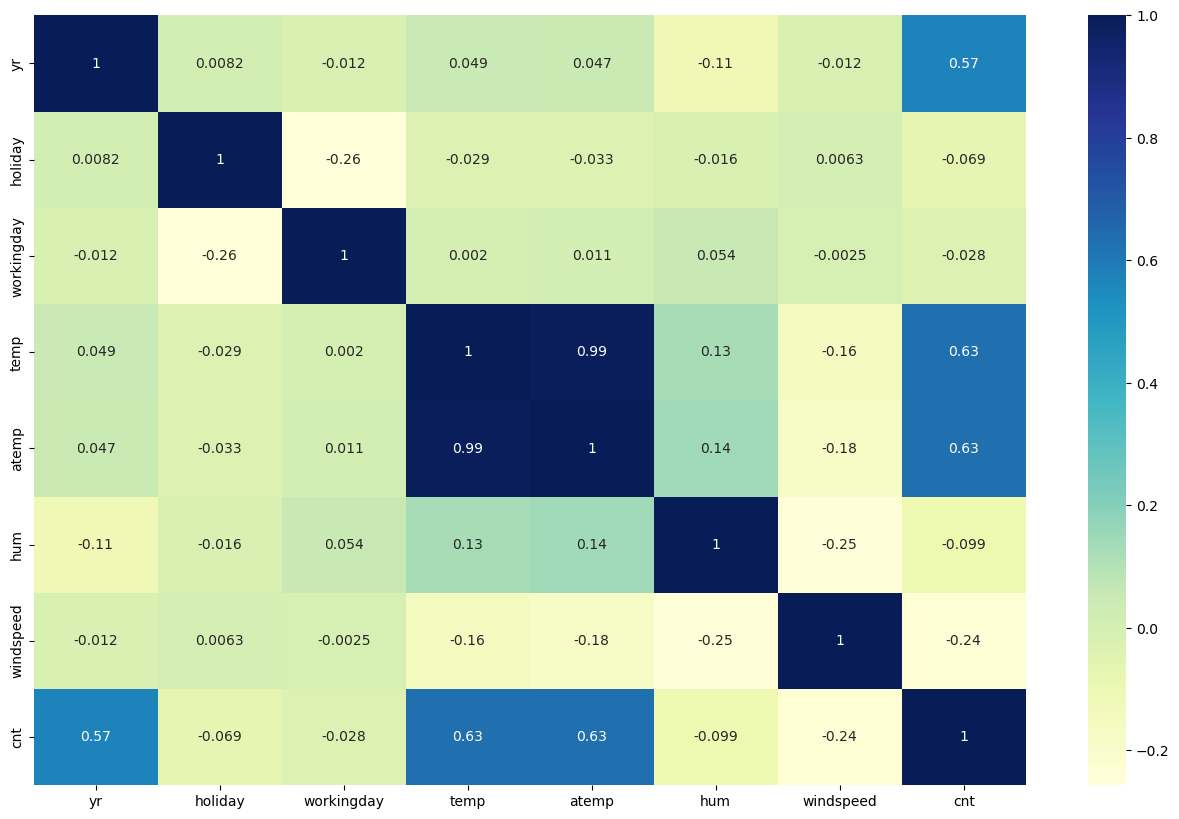

In [20]:
#training the model
bike_share=day.corr()
plt.figure(figsize=(16,10))
sns.heatmap(bike_share,annot=True,cmap="YlGnBu")
plt.show()

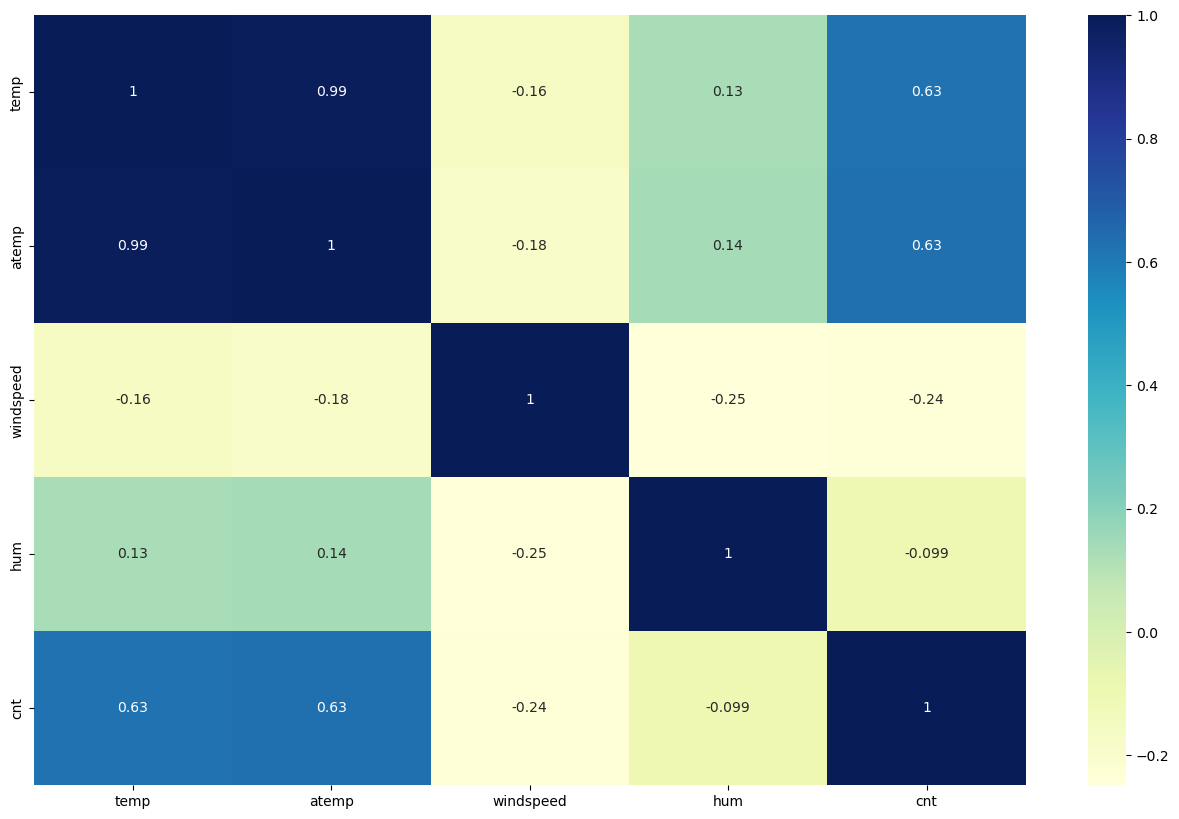

In [21]:
num_vars=['temp','atemp','windspeed','hum','cnt']
plt.figure(figsize=(16,10))
sns.heatmap(day[num_vars].corr(),annot=True,cmap="YlGnBu")
plt.show()

- temp and atemp possess high correlation(near to 1)

- atemp may be derived from temp,so we can drop atemp also

In [22]:
day.drop(['atemp'],axis=1,inplace= True)

# Data preparation

In [23]:
day.head() 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Misty and cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Misty and cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear or partly cloud,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thursday,1,Clear or partly cloud,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear or partly cloud,9.305237,43.6957,12.522300,1600


In [24]:
# creating dummies
day=pd.get_dummies(day,drop_first=True)
day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain or snow,weathersit_Misty and cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
day.shape

(730, 29)

In [26]:
#spliting data to train and test

In [27]:
day_train,day_test=train_test_split(day,train_size=0.7,random_state=100)

In [28]:
day_train.shape

(510, 29)

In [29]:
day_test.shape

(220, 29)

In [30]:
#visualisation of train dataset

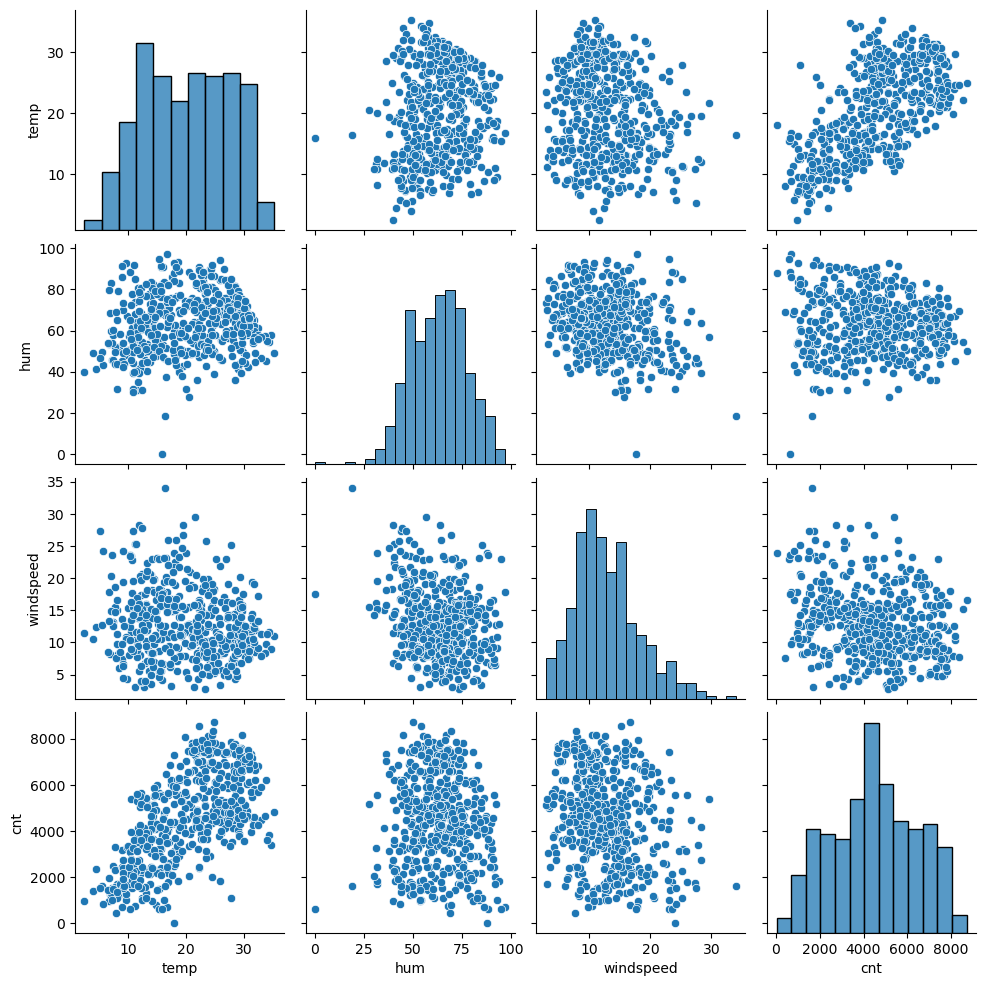

In [31]:
day_train_num=day_train[['temp','hum','windspeed','cnt']]
sns.pairplot(day_train_num)
plt.show()

In [32]:
day_train_num.corr()

,temp,hum,windspeed,cnt
temp,1.000000,0.155252,-0.187281,0.645048
hum,0.155252,1.000000,-0.267126,-0.058793
windspeed,-0.187281,-0.267126,1.000000,-0.253038
cnt,0.645048,-0.058793,-0.253038,1.000000


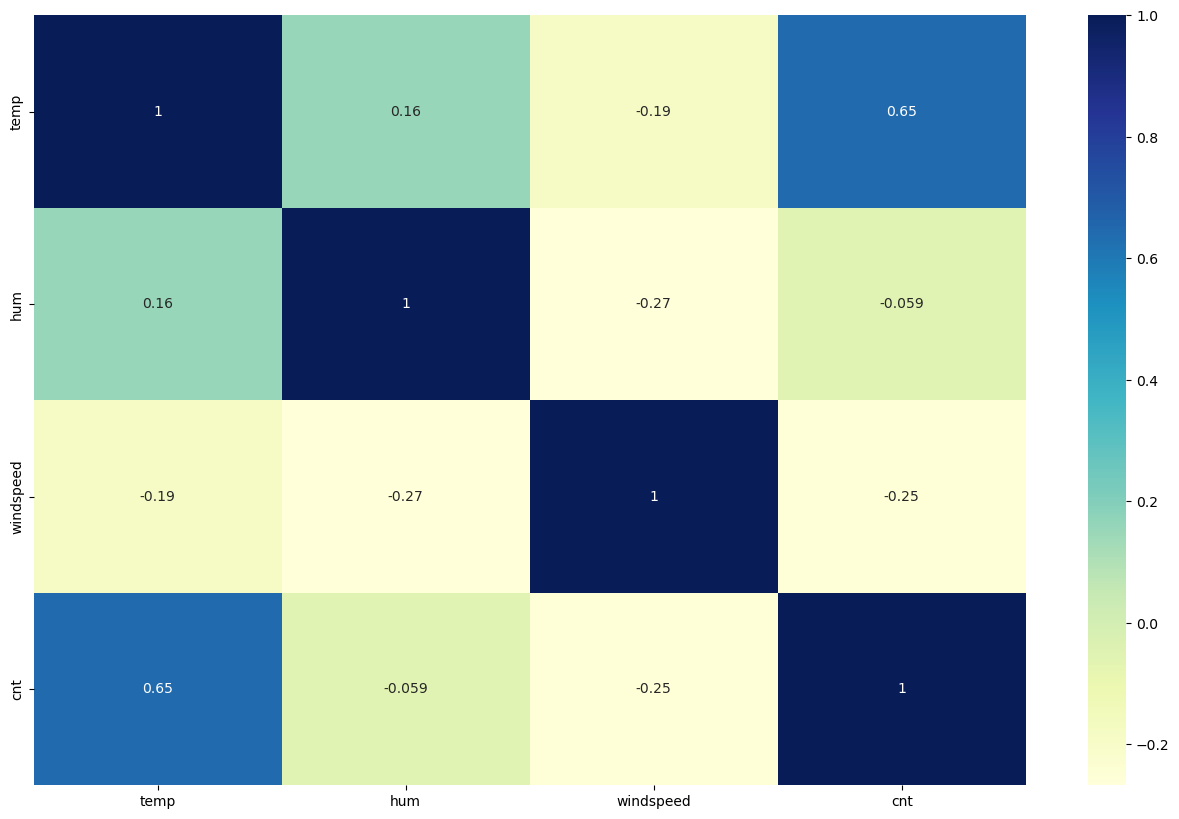

In [33]:
plt.figure(figsize=(16,10))
sns.heatmap(day_train_num.corr(),annot=True,cmap="YlGnBu")
plt.show()


### Rescaling

In [34]:
#Create scaler object

In [35]:
scaler=MinMaxScaler()

In [36]:


# create a list of numeric variable

In [37]:
num_vars=['temp','hum','windspeed','cnt']

In [38]:
#Fit on data
day_train[num_vars]=scaler.fit_transform(day_train[num_vars])
day_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain or snow,weathersit_Misty and cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


- We have to take x and y from the data frame

- Cnt should be target variable(y=cnt)

- The rest should be PV


In [39]:
y_train=day_train.pop('cnt')
x_train=day_train

In [40]:
x_train.shape

(510, 28)

In [41]:
y_train.shape

(510,)

In [42]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain or snow,weathersit_Misty and cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


# Model Building

In [43]:
#model 1
#Using recursive feature elimination

In [44]:
# Creating an instance of linear regression
lm=LinearRegression()
# Fitting model with x_train and y_train
lm.fit(x_train,y_train)
# Creating RFE instance on fitted lm
rfe= RFE(estimator=lm,n_features_to_select=15)
# converting rfe to fitted rfe
rfe=rfe.fit(x_train,y_train)


In [45]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light rain or snow', True, 1),
 ('weathersit_Misty and cloudy', True, 1)]

In [46]:
col=x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light rain or snow',
       'weathersit_Misty and cloudy'],
      dtype='object')

In [47]:
x_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Feb', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [48]:
# Create x_train dataframe with rfe selected data variable
x_train_rfe=x_train[col]


# building linear model using scratch model

#  Model 1




#  Checking VIF values using RFE selcted columns


In [49]:
def vif_table(dataframe):
    vif = pd.DataFrame() 
    vif['Feature'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


result = vif_table(x_train_rfe)
print(result)

                          Feature    VIF
3                             hum  30.89
2                            temp  17.79
4                       windspeed   4.72
5                   season_Spring   4.37
7                   season_Winter   4.06
6                   season_Summer   2.82
14    weathersit_Misty and cloudy   2.32
0                              yr   2.09
11                       mnth_Nov   1.85
9                        mnth_Jan   1.75
10                      mnth_July   1.59
8                        mnth_Dec   1.56
12                       mnth_Sep   1.41
13  weathersit_Light rain or snow   1.28
1                         holiday   1.06


In [51]:
x_train_lm1=sm.add_constant(x_train_rfe)
lr1=sm.OLS(y_train,x_train_lm1).fit()


In [52]:
lr1.params

const                            0.319667
yr                               0.230404
holiday                         -0.091089
temp                             0.481503
hum                             -0.162213
windspeed                       -0.188726
season_Spring                   -0.061255
season_Summer                    0.042337
season_Winter                    0.101921
mnth_Dec                        -0.035461
mnth_Jan                        -0.043411
mnth_July                       -0.055250
mnth_Nov                        -0.038701
mnth_Sep                         0.075467
weathersit_Light rain or snow   -0.246481
weathersit_Misty and cloudy     -0.054300
dtype: float64

In [54]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          8.15e-189
Time:                        17:59:07   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.3197      0.036      8.859      0.000       0.249       0.391
yr                                0.2304      0.008     28.487      0.000       0.215       0.246
holiday                          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                              0.4815      0.037     13.005      0.000       0.409       0.554
hum                              -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_Spring                    -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_Summer                     0.0423      0.015      2.761      0.006       0.012       0.072
season_Winter                     0.1019      0.018      5.656      0.000       0.067       0.137
mnth_Dec                         -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_Jan                         -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_July                        -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_Nov                         -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_Sep                          0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_Light rain or snow    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_Misty and cloudy      -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- here all the P-values are in acceptable range,ie,below 0.05

- from the table it is clear that temp and hum have high VIF value

- we are dropping hum value to check VIF value again



# Model 2


In [56]:
x_train_new=x_train_rfe.drop(['hum'],axis=1)

In [57]:
def vif_table(dataframe):
    vif = pd.DataFrame() 
    vif['Feature'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


result = vif_table(x_train_new)
print(result)

                          Feature   VIF
2                            temp  5.17
3                       windspeed  4.67
6                   season_Winter  2.95
4                   season_Spring  2.89
5                   season_Summer  2.24
0                              yr  2.07
10                       mnth_Nov  1.81
8                        mnth_Jan  1.66
9                       mnth_July  1.59
13    weathersit_Misty and cloudy  1.57
7                        mnth_Dec  1.47
11                       mnth_Sep  1.35
12  weathersit_Light rain or snow  1.09
1                         holiday  1.06


In [63]:
x_train_lm2=sm.add_constant(x_train_new)
lr2=sm.OLS(y_train,x_train_lm2).fit()


In [59]:
lr2.params

const                            0.245029
yr                               0.234455
holiday                         -0.091776
temp                             0.438717
windspeed                       -0.158482
season_Spring                   -0.071257
season_Summer                    0.034890
season_Winter                    0.086883
mnth_Dec                        -0.042806
mnth_Jan                        -0.050008
mnth_July                       -0.050046
mnth_Nov                        -0.039513
mnth_Sep                         0.068730
weathersit_Light rain or snow   -0.291749
weathersit_Misty and cloudy     -0.080073
dtype: float64

In [60]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          4.75e-186
Time:                        18:19:43   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2450      0.032      7.618      0.000       0.182       0.308
yr                                0.2345      0.008     28.687      0.000       0.218       0.251
holiday                          -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp                              0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                        -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_Spring                    -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_Summer                     0.0349      0.015      2.251      0.025       0.004       0.065
season_Winter                     0.0869      0.018      4.831      0.000       0.052       0.122
mnth_Dec                         -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_Jan                         -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_July                        -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_Nov                         -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_Sep                          0.0687      0.017      4.015      0.000       0.035       0.102
weathersit_Light rain or snow    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_Misty and cloudy      -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- P-values are all in acceptable range,mnth_Nov is very close to acceptable range

- All the VIF values except temp is below 5 which are acceptable.

In [70]:
x_train_new2=x_train_new.drop(['season_Summer'],axis=1)

In [71]:
def vif_table(dataframe):
    vif = pd.DataFrame() 
    vif['Feature'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


result = vif_table(x_train_new2)
print(result)

                          Feature   VIF
2                            temp  4.67
3                       windspeed  4.05
5                   season_Winter  2.55
4                   season_Spring  2.36
0                              yr  2.06
9                        mnth_Nov  1.81
7                        mnth_Jan  1.65
12    weathersit_Misty and cloudy  1.54
6                        mnth_Dec  1.46
8                       mnth_July  1.36
10                       mnth_Sep  1.21
11  weathersit_Light rain or snow  1.09
1                         holiday  1.06


In [74]:
x_train_lm3=sm.add_constant(x_train_new2)
lr3=sm.OLS(y_train,x_train_lm3).fit()


In [75]:
lr3.params

const                            0.289853
yr                               0.235037
holiday                         -0.091109
temp                             0.401861
windspeed                       -0.153654
season_Spring                   -0.104597
season_Winter                    0.062055
mnth_Dec                        -0.049628
mnth_Jan                        -0.055649
mnth_July                       -0.064719
mnth_Nov                        -0.046895
mnth_Sep                         0.053425
weathersit_Light rain or snow   -0.293851
weathersit_Misty and cloudy     -0.079765
dtype: float64

In [76]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.6
Date:                Sat, 28 Oct 2023   Prob (F-statistic):          4.08e-186
Time:                        18:40:26   Log-Likelihood:                 502.26
No. Observations:                 510   AIC:                            -976.5
Df Residuals:                     496   BIC:                            -917.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.2899      0.025     11.426      0.000       0.240       0.340
yr                                0.2350      0.008     28.656      0.000       0.219       0.251
holiday                          -0.0911      0.026     -3.483      0.001      -0.143      -0.040
temp                              0.4019      0.033     12.363      0.000       0.338       0.466
windspeed                        -0.1537      0.025     -6.082      0.000      -0.203      -0.104
season_Spring                    -0.1046      0.016     -6.684      0.000      -0.135      -0.074
season_Winter                     0.0621      0.014      4.351      0.000       0.034       0.090
mnth_Dec                         -0.0496      0.018     -2.828      0.005      -0.084      -0.015
mnth_Jan                         -0.0556      0.018     -3.042      0.002      -0.092      -0.020
mnth_July                        -0.0647      0.017     -3.720      0.000      -0.099      -0.031
mnth_Nov                         -0.0469      0.019     -2.476      0.014      -0.084      -0.010
mnth_Sep                          0.0534      0.016      3.387      0.001       0.022       0.084
weathersit_Light rain or snow    -0.2939      0.025    -11.885      0.000      -0.342      -0.245
weathersit_Misty and cloudy      -0.0798      0.009     -9.126      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.994   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.054
Skew:                          -0.690   Prob(JB):                     2.93e-40
Kurtosis:                       5.582   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- All the p values and vif values are in acceptable range


- So the model is acceptable.

# Residual Analysis and predictions

In [79]:
y_train_pred=lr3.predict(x_train_lm3)

In [80]:
y_train_pred

576    0.747085
426    0.479074
728    0.367273
482    0.575168
111    0.290522
         ...   
578    0.843332
53     0.249567
350    0.255913
79     0.314596
520    0.631078
Length: 510, dtype: float64

<Axes: ylabel='Density'>

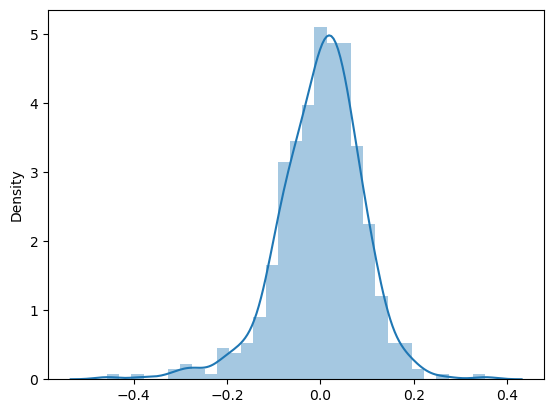

In [81]:
res=y_train-y_train_pred
sns.distplot(res)

- From the histogram it is clear that all the errors are distibuted normally

# - Predictions and evaluation on the test set

In [82]:
num_vars=['temp','hum','windspeed','cnt']

In [83]:
day_test[num_vars]=scaler.transform(day_test[num_vars])

In [85]:
day_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain or snow,weathersit_Misty and cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
day_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light rain or snow,weathersit_Misty and cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
day_test.shape

(220, 29)

In [89]:
day_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   yr                             220 non-null    int64  
 1   holiday                        220 non-null    int64  
 2   workingday                     220 non-null    int64  
 3   temp                           220 non-null    float64
 4   hum                            220 non-null    float64
 5   windspeed                      220 non-null    float64
 6   cnt                            220 non-null    float64
 7   season_Spring                  220 non-null    uint8  
 8   season_Summer                  220 non-null    uint8  
 9   season_Winter                  220 non-null    uint8  
 10  mnth_Aug                       220 non-null    uint8  
 11  mnth_Dec                       220 non-null    uint8  
 12  mnth_Feb                       220 non-null    u

## - Dividing into x and y

In [90]:
y_test=day_test.pop('cnt')
x_test=day_test

In [92]:
col=x_test.columns[rfe.support_]

In [93]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light rain or snow',
       'weathersit_Misty and cloudy'],
      dtype='object')

In [94]:
x_test_rfe=x_test[col]

In [96]:
x_test_rfe.head()

,yr,holiday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weathersit_Light rain or snow,weathersit_Misty and cloudy
184,0,1,0.831783,0.657364,0.084219,0,0,0,0,0,1,0,0,0,1
535,1,0,0.901354,0.610133,0.153728,0,1,0,0,0,0,0,0,0,0
299,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,0,0,0,1
221,0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0,1,0,0,0,0,0,0,0,0


In [98]:
x_test_rfe=x_test_rfe.drop(['hum','season_Summer'],axis=1)

In [99]:
x_test_rfe.head()

,yr,holiday,temp,windspeed,season_Spring,season_Winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weathersit_Light rain or snow,weathersit_Misty and cloudy
184,0,1,0.831783,0.084219,0,0,0,0,1,0,0,0,1
535,1,0,0.901354,0.153728,0,0,0,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,0,0,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0


In [100]:
x_test_lm=sm.add_constant(x_test_rfe)
lr=sm.OLS(y_test,x_test_lm).fit()


In [101]:
lr.params

const                            0.308352
yr                               0.249527
holiday                         -0.061239
temp                             0.323127
windspeed                       -0.043290
season_Spring                   -0.160260
season_Winter                    0.092998
mnth_Dec                        -0.116733
mnth_Jan                        -0.041004
mnth_July                       -0.032728
mnth_Nov                        -0.124508
mnth_Sep                         0.014118
weathersit_Light rain or snow   -0.209647
weathersit_Misty and cloudy     -0.069566
dtype: float64

In [104]:
y_test_pred=lr.predict(x_test_lm)

#residual

In [105]:
res=y_test-y_test_pred


In [106]:
r2_score(y_test,y_test_pred)

0.8429122205911197

In [107]:
print(r2_score(y_test,y_test_pred))

0.8429122205911197


In [108]:
print(r2_score(y_train,y_train_pred))

0.837500370438736



### By comparing test and train data value is almost same.

# Best fitted line equation

### cnt=0.289853+(0.235037*yr)+(0.401861 *temp)+(0.062055*season_winter)+(.053425*mnth_Sep)-(0.091109*holiday)-(0.153654*windspeed)-(0.104597*season_Spring)-(0.049628*mnth Dec)-(0.055649mnth_jan)-(0.064719mnth_Jul)-(0.046895*mnth_Nov)-(0.293851weathersit_Light Rain or Snow)-(0.079765weathersit_Mistry and Cloudy)

- By comparing the R-squared score of train and test data set,both are same.

- R-squared score of train set =0.837

- R-squared score of test data set =0.842

# Result intrepretation

- The company should focus on business in the season of Fall.

- The company should focus on business in the september month.

- As the trend is increasing in year by year,the business may not get good number of booking in coming months 

### - Variables to predict the demand for bikes are:

- Temperature
- Season(Spring,fall,winter)
- Month(Dec,Jan,Jul,Nov,Sep)
       